## 4.1 선형회귀

In [1]:
### 정규방정식

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1 을 추가
# 그냥 np.concatenate 하면 안에 넣은 것들이 한 줄의 array 로 모두 합쳐진 결과가 발생하는데
# 만약 np.c_를 하게 된다면 각각의 배열을 칼럼으로 세로로 붙여서 2차원 배열이 된다
# np.concatenate((c.T, d.T), axis = 1)  하는것과 같음

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best # X, X_b 에 대한 값을 내뱉어줌
# 각 theta 는 X_b 의 자리에 대한 정보와 같음

array([[3.91130717],
       [3.10395699]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # np.ones((2,1)) 과 X_new 두 가지를 세로로 붙여둔 것
y_predict = X_new_b.dot(theta_best)


y_predict

array([[ 3.91130717],
       [10.11922115]])

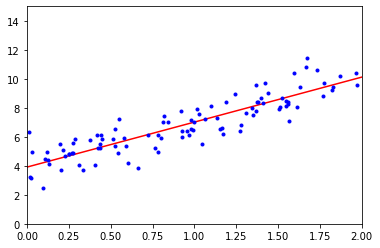

In [15]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
# 사이킷런에서 선형회귀 수행하기
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg.intercept_, lin_reg.coef_

(array([3.91130717]), array([[3.10395699]]))

In [20]:
lin_reg.predict(X_new)

array([[ 3.91130717],
       [10.11922115]])

In [21]:
# 최소제곱값을 통해서 theta 가장 우수한 값, 잔차, 랭크.. 계산할 수 있음
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.91130717],
       [3.10395699]])

In [16]:
# theta = X'y 를 계산한다. 
# X' 가 유사 역행렬
np.linalg.pinv(X_b).dot(y)

# 유사 역행렬 자체는 특잇값 분해 라 부르는 표준 행렬 분해 기법을 사용해 계산된다
## SVD는 훈련세트 행렬 X를 3개의 행렬곱셈으로 분해(np.linalg.svd())
## 유사역행렬은 V sigma' U' 로 계산

# sigma'를 계산하기 위해 알고리즘이 sigma를 먼저 구하고
# 그 다음 임곗값보다 작은 수를 0으로 바꿈 (여기서의 임곗값이  n x M 일떄의 더 낮은값을 의미하는 걸까?)
# 0이 아닌 값을 역수로 치환
# 마지막으로 만들어진 행렬을 전치

## X' = V sigma' U'
## V'X' = sigma' U'
## V'X'U = sigma'

array([[3.91130717],
       [3.10395699]])

#### 특잇값과 특이벡터
(참고: https://datascienceschool.net/02%20mathematics/03.04%20%ED%8A%B9%EC%9E%87%EA%B0%92%20%EB%B6%84%ED%95%B4.html)

N * M 크기의 A 를 3개의 행렬곱으로 나타내는 것을 특이분해라고 부름

A=UΣVT

    - Σ 는 N X M 의 실수를 가짐, 이때의 값을 특이값이라고 부름
    - 큰 수부터 작은 수 순서로 배열
    - N > M 이라면 M개의 (둘 중 더 작은값 기준) 특잇값을 가짐, M 이후의 아래 값은 영행렬이 됨
    - N < M 이라면 N개의 (둘 중 더 작은 값 기준) 특잇값을 가짐, N 이후의 오른쪽 값은 영행렬이 됨

    - U 는 N차원 정방행렬로 모든 열벡터가 단위벡터, 서로 직교
    - N X N

    - V 는 M차원 정방행렬, 모든 열벡터가 단위벡터, 서로 직교
    - M X M





In [24]:
from numpy.linalg import svd
A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

In [28]:
A.shape

(3, 2)

In [25]:
U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -2.06937879e-16,  9.12870929e-01]])

In [26]:
S

array([3.46410162, 3.16227766])

In [27]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [29]:
np.diag(S,1)[:, 1:] # S 가 시그마이고, 이 값의 실제 모습을 구하기 위해 왼쪽과 같이 진행한다
#np.diag(S) 라고 하면 기존 S가 2개 array 를 갖고 있기 때문에, 2x2의 array 에 해당 값을 넣어줌
#np.diag (S,1 ) 이라고 하면, S 에서 중심보다 1칸씩 밀려난 공간에 값을 입력하게 됨
#np.diag(S, 1)[:, 1:] 행은 전체, 열은 1, 2 두가지 값만 불러오는 것,
# 이렇게 되면, 우리 머릿속의 Sigma 를 구할 수 있음

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [30]:
np.diag(S,1)

array([[0.        , 3.46410162, 0.        ],
       [0.        , 0.        , 3.16227766],
       [0.        , 0.        , 0.        ]])

In [31]:
np.diag(S)

array([[3.46410162, 0.        ],
       [0.        , 3.16227766]])

In [32]:
U @ np.diag(S, 1)[:, 1:] @ VT 
# -> 이렇게 하면 다시 원래 행렬 A 를 구할 수 있음 

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [33]:
## 4.2 경사하강법
# 무작위 초기화 하고, 학습률 하이퍼파라미터를 사용하여 수렴하고자 노력한다
# 학습률이 너무 작으면 학습에 속도가 늦고, 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰어 
# 이전보다 더 높은 곳으로 올라가고, 오차 발산 가능성 높음

## 경사하강법의 문제 
### 1. 무작위 초기화 때문에 알고리즘이 왼 -> 오 진행하면, 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴
#### 다행히 선형회귀를 위한 MSE 비용함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수
#### 연속된 함수, 갑자기 기울기 변하지도 않음 -> 이 함수의 도함수가 립시츠 연속, 
#### 어떤 함수의 도함수가 일정한 범위 안에서 변할 때 이 함수를 립시츠 연속 함수라고 말할 수 있다
#### sin(x) 는 립시츠 연속함수이나, 그 도함수는 x = 0 일때 기울기가 무한대가 되므로
#### 립시츠 연속함수가 아니다
#### MSE 는 x 가 무한대일때 기울기가 무한대가 되므로, locally 립시츠 함수라고 말할 수 있음

#### 특성 스케일이 서로 다를 경우, 길쭉한 모양을 띨 수 있다 ,
#### 특성 1, 2 중에서 더 작은 것이 비용함수에 영향을 주기 위해서는 작은 feature 의 theta 가 더 크게 바뀌어야 함
##### 그래서 경사하강법 사용 시, 모든 feature 가 같은 스케일을 갖도록 만들어야 함 


In [34]:
## 4.2.1 배치 경사 하강법
### 각 모델 파라미터에 대해 비용함수의 그래디언트를 계산해야 함 -> 편미분을 사용
### 각 변수의 기울기를 구하는 것과 같..음...
### 한꺼번에 계산할 수 있음 

In [38]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # 무작위 초기화
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [39]:
theta # 계산된 세타는 정규 방정식으로 찾은 것과 같다
# 경사하강법이 잘 작동되었다는 뜻
# 적절한 학습률을 찾으려면 그리드 탐색이 필요
## 그리드 탐색 수렴하는데 너무 오래걸리는 모델을 막기 위해 '반복횟수' 제한 ** 

# 반복횟수가 너무 작으면 최적점 도달 전에 알고리즘이 멈춤
# 반복횟수가 너무 크면 시간 낭비
## 해결책? 반복횟수를 아주 크게 지정, 그래디언트 백터 아주 작아지면 = 벡터의 norm 이 어떤 허용오차값보다 작아지면 알고리즘 중지
### 수렴률 : 허용오차(tolerance) 범위 안에서 최적의 솔루션 도달하기 위해서는 O(1/e)반복이 걸림
#### 오차 허용오차를 1/10으로 줄이면, 알고리즘 반복은 10배 증가

array([[3.91130717],
       [3.10395699]])